# Checking R_h calculated with Plummer vs. King

In [1]:
%matplotlib inline

In [2]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties
def load_profiles(s=2.,pmmag=0.25,ca=1.,ttype='st'):
    fldr = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/'
    fl='2comp_cuspplum_nfw_SP_%i_PM_%i_ca_%02d'%(int(s),int(pmmag*100.),int(ca*10.))
    print fldr,fl
    import glob
    fls = glob.glob(fldr+fl+'_flattening_profile_%s*'%ttype)
    times_list = [float(s.split('_')[-1][:-4]) for s in fls]
    fls = np.array(fls)[np.argsort(np.array(times_list))]
    times = np.sort(times_list)
    return times, [pd.read_csv(fl) for fl in fls]
def load_summary(s=2.,pmmag=0.25,ca=1.):
    fldr = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/'
    fl='2comp_cuspplum_nfw_SP_%i_PM_%i_ca_%02d_properties.csv'%(int(s),int(pmmag*100.),int(ca*10.))
    return pd.read_csv(fldr+fl)

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
times,fls = load_profiles(s=1.,pmmag=0.1)
summary = load_summary(s=1.,pmmag=0.1)

/data/gaia-eso/jls/m2m/CraterII/vmax_universal/flattening_profiles/ 2comp_cuspplum_nfw_SP_1_PM_10_ca_10


119.196348501 0.669826744327 7.74475189518e-08
0.347419716987 14.070558361400002 1.21895845073e-10
7.215269999999999


[]

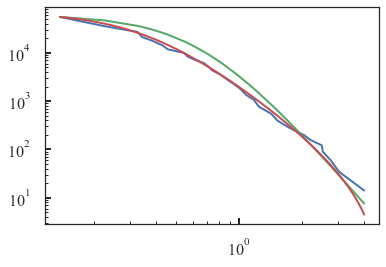

In [41]:
ii=28
from transform_penarrubia import king_density
print summary['s'].values[ii], summary['r_half'].values[ii], summary['eps'].values[ii]
print summary['r_core'].values[ii], summary['c_king'].values[ii], summary['eps_king'].values[ii]
print summary['times'].values[ii]
plt.plot(fls[ii]['radii_st'],fls[ii]['dens_st'])
Rsc = summary['r_half'].values[ii]
Rc = summary['r_core'].values[ii]
rt = summary['c_king'].values[ii]*summary['r_core'].values[ii]
# Rc=0.794
# rt=Rc* 12.5
plt.plot(fls[ii]['radii_st'],
         fls[ii]['dens_st'][0]*(1.+(fls[ii]['radii_st'][0]/Rsc)**2)**2.5/(1.+(fls[ii]['radii_st']/Rsc)**2)**2.5)
xx = np.logspace(np.log10(fls[ii]['radii_st'][0]),np.log10(fls[ii]['radii_st'].values[-1]),200)
plt.plot(xx,
         king_density(xx,Rc,rt)/king_density(xx[0],Rc,rt)*fls[ii]['dens_st'][0])
plt.semilogy()
plt.semilogx()

In [42]:
from transform_penarrubia import half_mass_radius
conc = summary['c_king'].values
conc[conc>100.]=100.
rhh = np.array([half_mass_radius(rc,ck) for rc,ck in zip(summary['r_core'].values,conc)])

In [43]:
rhh[28], summary['r_half'].values[28]

(0.6990464315526185, 0.669826744327)

In [44]:
rhh[30], summary['r_half'].values[30]

(0.5254200244225937, 0.499206282724)

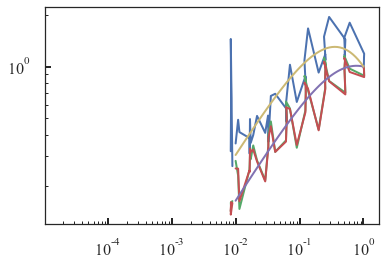

In [45]:
from orbit import penarrubia_tracks_Mh
plt.plot(summary['mass_dm_core_init']/summary['mass_dm_core_init'][0],summary['r_core']/summary['r_core'][0])
plt.plot(summary['mass_dm_core_init']/summary['mass_dm_core_init'][0],summary['r_half']/summary['r_half'][0])
plt.plot((summary['mass_dm_core_init']/summary['mass_dm_core_init'][0]),rhh/rhh[0])

plt.semilogy()
plt.semilogx()
xx = np.logspace(-2.,0.)
plt.plot(xx,penarrubia_tracks_Mh(xx)[2])
plt.plot(xx,penarrubia_tracks_Mh(xx)[1])

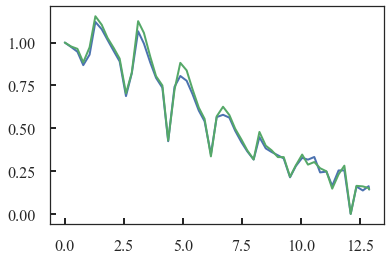

In [46]:
plt.plot(summary['times'],rhh/rhh[0])
plt.plot(summary['times'],summary['r_half']/summary['r_half'][0])

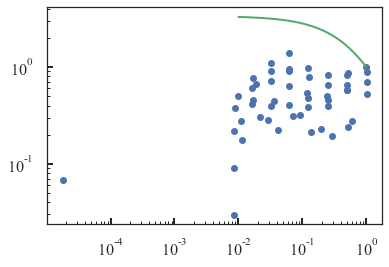

In [47]:
plt.plot(summary['mass_dm_core_init']/summary['mass_dm_core_init'][0],summary['c_king']/summary['c_king'][0],'.')
plt.semilogy()
plt.semilogx()
plt.plot(xx,penarrubia_tracks_Mh(xx)[3])

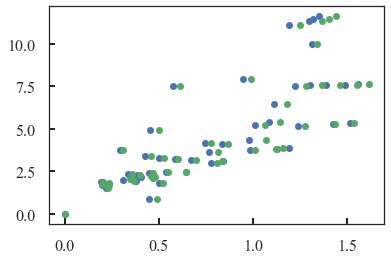

In [48]:
plt.plot(summary['r_half'],summary['sig_proj_flat'],'.')
plt.plot(rhh,summary['sig_proj_flat'],'.')